# Naive Bayes Classification

In this exercise we investigate the Naive Bayes Classification. First, explore the algorithm using a artificial data set. Then, we consider a real world example featuring the classification of text samples.

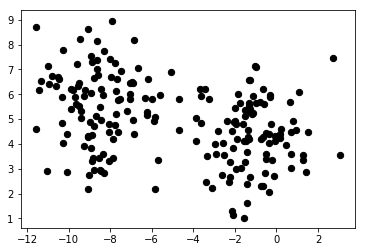

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(200, 2, centers=2, random_state=7, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c='black', s=40);
plt.show()

###### Emplay Naive Bayes Classification

In [2]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [3]:
Xnew = [-13, 0] + [18, 10] * np.random.rand(5000, 2)
ynew = model.predict(Xnew)

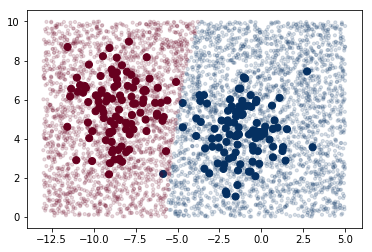

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=10, cmap='RdBu', alpha=0.15)
plt.show()

## A Real World Example

In [5]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
#data.target_names
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics', 'rec.autos']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [8]:
print(train.data[15])
print(train.target_names[train.target[15]])

From: bruce@liv.ac.uk (Bruce Stephens)
Subject: Re: Question from an agnostic
Organization: Centre for Mathematical Software Research, Univ. Liverpool
Lines: 16

>>>>> On 2 May 93 13:53:23 GMT, damon@math.okstate.edu (HASTINGS DAMON TOD) said:

> A Christian friend of mine once reasoned that if we were never created, then
> we could not exist.  Therefore we were created, and therefore there exists a
> Creator.

> Is this statement considered to be a valid proof by many Christians (and
> followers of other religions, I suppose)?  [rest deleted]

Some variant is quite popular.  This, and other arguments, are
discussed in John Leslie Mackie's "The Miracle of Theism: arguments
for and against the existence of God".  Although Mackie ultimately
sides with "against", his arguments are, I think, quite fair to both
sides.  Brief discussions can be found in the alt.atheism FAQs.
--
Bruce              CMSR, University of Liverpool

soc.religion.christian


## Excursion: Feature Engineering

##### Transform the data set and employ classifier

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

##### Investigate the result

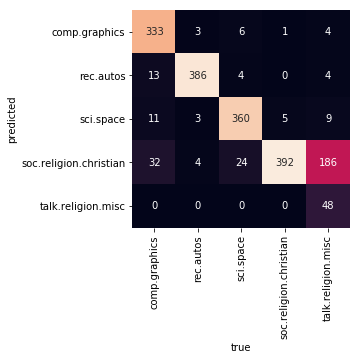

In [10]:
import seaborn as sns; 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true')
plt.ylabel('predicted');
plt.show()

##### Try out the model on your own

###### Function from [Source](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html)

In [11]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [12]:
predict_category('sun, moon and stars')

'sci.space'

### Q: What are the Pros and Cons of the method?